In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Preprocessing the Dataset

In [3]:
# load the training data
training_data = pd.read_csv('data/train.csv')
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,y
0,300000.0,2.0,2.0,1.0,40.0,1.0,-2.0,-2.0,-2.0,-1.0,...,0.0,280.0,0.0,0.0,0.0,0.0,280.0,0.0,0.0,0.0
1,170000.0,1.0,1.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,...,137986.0,141319.0,139463.0,13000.0,6154.0,15000.0,6000.0,7000.0,5000.0,0.0
2,100000.0,2.0,1.0,2.0,25.0,2.0,0.0,0.0,2.0,0.0,...,86433.0,65149.0,64810.0,4100.0,5514.0,2500.0,3000.0,4000.0,3000.0,1.0
3,220000.0,2.0,5.0,2.0,46.0,0.0,0.0,0.0,0.0,0.0,...,113520.0,101164.0,88354.0,5000.0,6000.0,5000.0,3649.0,3580.0,4000.0,0.0
4,320000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0.0


In [4]:
# load the testing data
testing_data = pd.read_csv('data/validation.csv')
testing_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,y
0,30000.0,2.0,2.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,27698.0,28987.0,29568.0,1402.0,2000.0,2000.0,2000.0,2500.0,2000.0,0.0
1,230000.0,2.0,2.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8729.0,10816.0,15893.0,1295.0,1300.0,468.0,2816.0,5893.0,5977.0,0.0
2,200000.0,2.0,2.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,85520.0,84945.0,81431.0,4762.0,3856.0,2753.0,2900.0,3000.0,2800.0,0.0
3,30000.0,2.0,2.0,2.0,23.0,2.0,-1.0,-1.0,-1.0,0.0,...,755.0,755.0,220.0,483.0,859.0,755.0,0.0,0.0,0.0,1.0
4,180000.0,1.0,1.0,2.0,31.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,7108.0,1300.0,0.0,0.0,0.0,7108.0,1300.0,0.0,0.0


In [5]:
# separate the target from teh dataset
train_x, train_y = np.split(training_data.values, [23], axis=1)
test_x, test_y = np.split(testing_data.values, [23], axis=1)
# transform the dataset into a 1-dimension array
train_y = train_y.reshape(-1)
test_y = test_y.reshape(-1)

In [6]:
print('training set shape:\t', train_x.shape)
print('testing set shape:\t', test_x.shape)

training set shape:	 (19268, 23)
testing set shape:	 (4129, 23)


In [7]:
# standardize training dataset
train_mu = np.mean(train_x, axis=0)
train_sigma = np.std(train_x, axis=0)
train_x = (train_x - train_mu)/train_sigma
# standardize testing dataset
test_mu = np.mean(test_x, axis=0)
test_sigma = np.std(test_x, axis=0)
test_x = (test_x - test_mu)/test_sigma
print('train_x:\t\n',train_x)
print('test_s:\t\n', test_x)

train_x:	
 [[ 1.24548071  0.80750361  0.17543203 ... -0.3929319  -0.42779318
  -0.35811428]
 [ 0.15408144 -1.23838456 -1.10738556 ...  0.37635253  0.50152881
   0.17464626]
 [-0.4335951   0.80750361 -1.10738556 ... -0.02711832  0.10324796
  -0.03845796]
 ...
 [ 1.74920345 -1.23838456 -1.10738556 ...  1.6615417   2.36535043
   1.67415408]
 [ 0.23803523  0.80750361 -1.10738556 ... -0.43058918 -0.42779318
  -0.35811428]
 [-0.26568752  0.80750361  0.17543203 ... -0.3942768  -0.42779318
  -0.35811428]]
test_s:	
 [[-1.03916801e+00  7.86095865e-01  1.68772163e-01 ... -1.70765302e-01
  -9.29943255e-02 -1.71176750e-01]
 [ 6.22004184e-01  7.86095865e-01  1.68772163e-01 ... -5.19149215e-02
   3.75892373e-01  2.72857810e-01]
 [ 3.72828355e-01  7.86095865e-01  1.68772163e-01 ... -3.96803235e-02
  -2.38981424e-02 -8.18562453e-02]
 ...
 [ 1.61870750e+00 -1.27210948e+00 -1.07119271e+00 ...  1.72486914e+00
  -3.46439125e-01 -3.94478013e-01]
 [-5.40816354e-01  7.86095865e-01  1.40873704e+00 ... -6.35300

# KNN - Raw Dataset

Text(0, 0.5, 'Error Rate')

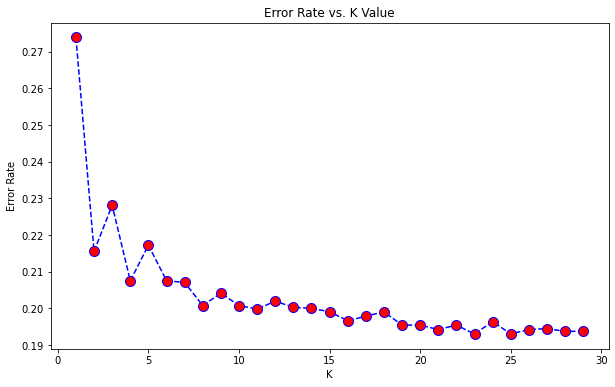

In [8]:
# choose K-value with the lowest error rate.
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As is shown on the figure, the error rate fluctuates steadily around after K-value of 15. However, the grid search should still be used to choose the actual proper K-value. Considering the size of the hyperparameter search space is pretty large, randomized search is used instead to choose the proper K-value.

In [14]:
# randomized search
param_grid = [{
    'weights': ["uniform","distance"],
    'n_neighbors': range(1, 20),
    'metric':['euclidean', 'manhattan', 'cosine']}]

knn_clf = KNeighborsClassifier()
randomized_search = RandomizedSearchCV(knn_clf, param_grid, cv=10, verbose=2)
randomized_search.fit(train_x, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.5s
[CV] END ..metric=manhattan, n_neighbors=8, weights=distance; total time=   0.6s
[CV] END ..metric=manhattan, n_neighbors=8, we

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions=[{'metric': ['euclidean', 'manhattan',
                                                    'cosine'],
                                         'n_neighbors': range(1, 20),
                                         'weights': ['uniform', 'distance']}],
                   verbose=2)

In [17]:
randomized_search.best_params_

{'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean'}

In [18]:
# try the hyper-parameter on the test set
knn_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='uniform')
knn_clf.fit(train_x, train_y)
train_y_pred = knn_clf.predict(train_x)
test_y_pred = knn_clf.predict(test_x)
print('Train accuracy of kNN', accuracy_score(train_y, train_y_pred))
print('Test accuracy of kNN', accuracy_score(test_y, test_y_pred))

Train accuracy of kNN 0.8183516711646253
Test accuracy of kNN 0.8009203196899976


Plot confusion matrix and classification report.

In [20]:
print("Confusion Matrix:\t\n", confusion_matrix(test_y, test_y_pred))
print("Classificaiton Report:\t\n", classification_report(test_y, test_y_pred))

Confusion Matrix:	
 [[3023  191]
 [ 631  284]]
Classificaiton Report:	
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      3214
         1.0       0.60      0.31      0.41       915

    accuracy                           0.80      4129
   macro avg       0.71      0.63      0.64      4129
weighted avg       0.78      0.80      0.78      4129



# KNN - Balanced Datas

In [3]:
# load the training data
training_data = pd.read_csv('data/balanced_train_data.csv')
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,y
0,300000.0,2.0,2.0,1.0,40.0,1.0,-2.0,-2.0,-2.0,-1.0,...,0.0,280.0,0.0,0.0,0.0,0.0,280.0,0.0,0.0,0.0
1,170000.0,1.0,1.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,...,137986.0,141319.0,139463.0,13000.0,6154.0,15000.0,6000.0,7000.0,5000.0,0.0
2,100000.0,2.0,1.0,2.0,25.0,2.0,0.0,0.0,2.0,0.0,...,86433.0,65149.0,64810.0,4100.0,5514.0,2500.0,3000.0,4000.0,3000.0,1.0
3,220000.0,2.0,5.0,2.0,46.0,0.0,0.0,0.0,0.0,0.0,...,113520.0,101164.0,88354.0,5000.0,6000.0,5000.0,3649.0,3580.0,4000.0,0.0
4,320000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0.0


In [4]:
# load the testing data
testing_data = pd.read_csv('data/validation.csv')
testing_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,y
0,30000.0,2.0,2.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,27698.0,28987.0,29568.0,1402.0,2000.0,2000.0,2000.0,2500.0,2000.0,0.0
1,230000.0,2.0,2.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8729.0,10816.0,15893.0,1295.0,1300.0,468.0,2816.0,5893.0,5977.0,0.0
2,200000.0,2.0,2.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,85520.0,84945.0,81431.0,4762.0,3856.0,2753.0,2900.0,3000.0,2800.0,0.0
3,30000.0,2.0,2.0,2.0,23.0,2.0,-1.0,-1.0,-1.0,0.0,...,755.0,755.0,220.0,483.0,859.0,755.0,0.0,0.0,0.0,1.0
4,180000.0,1.0,1.0,2.0,31.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,7108.0,1300.0,0.0,0.0,0.0,7108.0,1300.0,0.0,0.0


In [5]:
# separate the target from the dataset
train_x, train_y = np.split(training_data.values, [23], axis=1)
test_x, test_y = np.split(testing_data.values, [23], axis=1)
# transform the dataset into a 1-dimension array
train_y = train_y.reshape(-1)
test_y = test_y.reshape(-1)

In [33]:
print('training set shape:\t', train_x.shape)
print('testing set shape:\t', test_x.shape)

training set shape:	 (28006, 23)
testing set shape:	 (4129, 23)


In [6]:
# standardize training dataset
train_mu = np.mean(train_x, axis=0)
train_sigma = np.std(train_x, axis=0)
train_x = (train_x - train_mu)/train_sigma
# standardize testing dataset
test_mu = np.mean(test_x, axis=0)
test_sigma = np.std(test_x, axis=0)
test_x = (test_x - test_mu)/test_sigma
print('train_x:\t\n',train_x)
print('test_s:\t\n', test_x)

train_x:	
 [[ 1.37645554  0.86690888  0.16878227 ... -0.37936269 -0.41392627
  -0.35480961]
 [ 0.25304201 -1.25778238 -1.19210309 ...  0.46521449  0.58846221
   0.2402886 ]
 [-0.35187296  0.86690888 -1.19210309 ...  0.02225443  0.15886715
   0.00224932]
 ...
 [ 0.08795977  0.86690888 -0.52099757 ... -0.29874801  1.90665808
  -0.20790015]
 [ 0.33945844 -0.05595119 -0.27803328 ... -0.28821224 -0.41392627
  -0.18489816]
 [ 0.33945844 -1.05984394 -1.19210309 ... -0.42070563 -0.41392627
  -0.35480961]]
test_s:	
 [[-1.03916801e+00  7.86095865e-01  1.68772163e-01 ... -1.70765302e-01
  -9.29943255e-02 -1.71176750e-01]
 [ 6.22004184e-01  7.86095865e-01  1.68772163e-01 ... -5.19149215e-02
   3.75892373e-01  2.72857810e-01]
 [ 3.72828355e-01  7.86095865e-01  1.68772163e-01 ... -3.96803235e-02
  -2.38981424e-02 -8.18562453e-02]
 ...
 [ 1.61870750e+00 -1.27210948e+00 -1.07119271e+00 ...  1.72486914e+00
  -3.46439125e-01 -3.94478013e-01]
 [-5.40816354e-01  7.86095865e-01  1.40873704e+00 ... -6.35300

Text(0, 0.5, 'Error Rate')

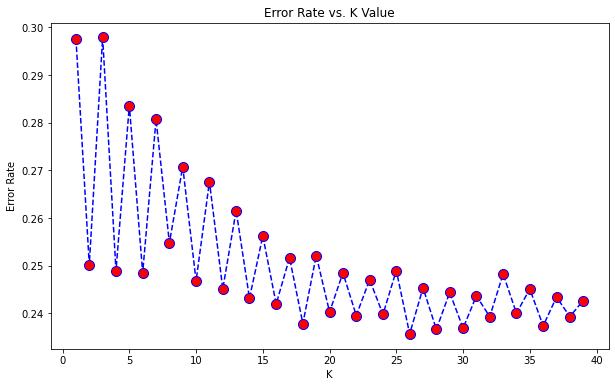

In [36]:
# choose K-value with the lowest error rate.
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
# randomized search
param_grid = [{
    'weights': ["uniform","distance"],
    'n_neighbors': range(1, 20),
    'metric':['euclidean', 'manhattan', 'cosine']}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, verbose=2)
r_search.fit(train_x, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.8s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.6s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.7s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.6s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.7s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.6s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.6s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.7s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.8s
[CV] END .....metric=cosine, n_neighbors=16, weights=uniform; total time=   1.7s
[CV] END .metric=manhattan, n_neighbors=14, weights=distance; total time=   1.3s
[CV] END .metric=manhattan, n_neighbors=14, we

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions=[{'metric': ['euclidean', 'manhattan',
                                                    'cosine'],
                                         'n_neighbors': range(1, 20),
                                         'weights': ['uniform', 'distance']}],
                   verbose=2)

In [39]:
randomized_search.best_params_

{'weights': 'distance', 'n_neighbors': 14, 'metric': 'manhattan'}

In [41]:
# try the hyper-parameter on the test set
knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')
knn_clf.fit(train_x, train_y)
train_y_pred = knn_clf.predict(train_x)
test_y_pred = knn_clf.predict(test_x)
print('Train accuracy of kNN', accuracy_score(train_y, train_y_pred))
print('Test accuracy of kNN', accuracy_score(test_y, test_y_pred))

Train accuracy of kNN 0.9996072270227808
Test accuracy of kNN 0.7519980624848631


In [42]:
print("Confusion Matrix:\t\n", confusion_matrix(test_y, test_y_pred))
print("Classificaiton Report:\t\n", classification_report(test_y, test_y_pred))

Confusion Matrix:	
 [[2630  584]
 [ 440  475]]
Classificaiton Report:	
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      3214
         1.0       0.45      0.52      0.48       915

    accuracy                           0.75      4129
   macro avg       0.65      0.67      0.66      4129
weighted avg       0.77      0.75      0.76      4129

